In [521]:
import pandas as pd

import boto3

import numpy as np

# Import necessary library for color palette
from matplotlib.colors import LinearSegmentedColormap

from dotenv import load_dotenv
import os

from io import StringIO
pd.set_option("display.max_columns", 50)

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import style
# which style sheet to use 
style.use('ggplot')

from matplotlib.ticker import FuncFormatter

# import ipywidgets library for creating widgets
import ipywidgets as widgets

# import 'Axes3D' class from the 'mplot3d' toolkit for creating 3D charts
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [522]:
aws_access_key_id = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRET_KEY")

In [523]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
    """
    Reads a CSV file from an S3 bucket and returns it as a pandas DataFrame.

    Parameters:
        bucket (str): 
            The name of the S3 bucket.
        path (str): 
            The path within the S3 bucket where the file is located.
        filename (str): 
            The name of the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the contents of the CSV file.

    """
    s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_key)
    
    full_path = f'{path}{filename}'
    
    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object['Body'].read().decode('utf-8')
    output_df = pd.read_csv(StringIO(object))
    
    return output_df

In [524]:
s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_key)
bucket = 'cubix-chicago-taxi-rr'

community_areas_path = 'transformed_data/community_areas/'
company_path = 'transformed_data/company/'
date_path = 'transformed_data/date/'
payment_type_path = 'transformed_data/payment_type/'
taxi_trips_path = 'transformed_data/taxi_trips/'
weather_path = 'transformed_data/weather/'

In [525]:
community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, filename='community_areas_master.csv')
company = read_csv_from_s3(bucket=bucket, path=company_path, filename='company_master.csv')
date = read_csv_from_s3(bucket=bucket, path=date_path, filename='data_dimension.csv')
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename='payment_type_master.csv')

In [526]:
trips_list = []

for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
    taxi_trip_key = file ['Key']

    if taxi_trip_key.split("/")[-1].strip() !='':
        if taxi_trip_key.split('.')[1] == 'csv':
            
            filename = taxi_trip_key.split("/")[-1]
            #print(filename)
            trip = read_csv_from_s3(bucket, taxi_trips_path, filename)

            trips_list.append(trip)
            print(f"{filename} has been added.")

taxi_2023-12-03.csv has been added.
taxi_2023-12-04.csv has been added.
taxi_2023-12-05.csv has been added.
taxi_2023-12-06.csv has been added.
taxi_2023-12-07.csv has been added.
taxi_2023-12-08.csv has been added.
taxi_2023-12-09.csv has been added.
taxi_2023-12-10.csv has been added.
taxi_2023-12-11.csv has been added.
taxi_2023-12-12.csv has been added.
taxi_2023-12-13.csv has been added.
taxi_2023-12-14.csv has been added.
taxi_2023-12-15.csv has been added.
taxi_2023-12-16.csv has been added.
taxi_2023-12-17.csv has been added.
taxi_2023-12-18.csv has been added.
taxi_2023-12-19.csv has been added.
taxi_2023-12-20.csv has been added.


In [527]:
trips = pd.concat(trips_list, ignore_index=True)

In [528]:
trips.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area_id,dropoff_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03T23:45:00.000,2023-12-03T23:45:00.000,360,0.50,5.00,0.00,0.0,4.5,9.50,8,32,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,1,2
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03T23:45:00.000,2023-12-04T00:00:00.000,1312,17.61,43.25,9.75,0.0,5.0,58.50,76,8,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,1,7
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03T23:45:00.000,2023-12-03T23:45:00.000,268,0.91,5.75,4.00,0.0,1.5,11.75,8,32,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,1,8
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03T23:45:00.000,2023-12-04T00:00:00.000,1080,0.60,26.75,5.00,0.0,6.0,37.75,56,33,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,1,2
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03T23:45:00.000,2023-12-04T00:15:00.000,1692,10.07,29.00,0.00,0.0,0.0,29.00,44,34,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,5,8


In [529]:
weather_list = []

for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)['Contents']:
    weather_key = file['Key']
    
    if weather_key.split("/")[-1].strip() !='':
        if weather_key.split('.')[1] == 'csv':
            
            filename = weather_key.split('/')[-1]
            #print(filename)
            weather_daily = read_csv_from_s3(bucket, weather_path, filename)

            weather_list.append(weather_daily)
            print(f"{filename} has been added.")

weather_2023-12-03.csv has been added.
weather_2023-12-04.csv has been added.
weather_2023-12-05.csv has been added.
weather_2023-12-06.csv has been added.
weather_2023-12-07.csv has been added.
weather_2023-12-08.csv has been added.
weather_2023-12-09.csv has been added.
weather_2023-12-10.csv has been added.
weather_2023-12-11.csv has been added.
weather_2023-12-12.csv has been added.
weather_2023-12-13.csv has been added.
weather_2023-12-14.csv has been added.
weather_2023-12-15.csv has been added.
weather_2023-12-16.csv has been added.
weather_2023-12-17.csv has been added.
weather_2023-12-18.csv has been added.
weather_2023-12-19.csv has been added.
weather_2023-12-20.csv has been added.


In [530]:
weather = pd.concat(weather_list, ignore_index=True)

In [531]:
weather.head()

,datetime,temperature,wind_speed,precipitation,rain
0,2023-12-03 00:00:00,4.8,7.9,0.0,0.0
1,2023-12-03 01:00:00,4.6,6.9,0.0,0.0
2,2023-12-03 02:00:00,4.5,8.3,0.0,0.0
3,2023-12-03 03:00:00,4.7,8.5,0.0,0.0
4,2023-12-03 04:00:00,4.7,9.2,0.0,0.0


# Join them together

In [532]:
trips_full = pd.merge(trips, weather, left_on='datetime_for_weather', right_on='datetime', how='inner')
trips_full = trips_full.drop(columns=['datetime'])

In [533]:
trips_full = pd.merge(trips_full, company, left_on='company_id', right_on='company_id', how='inner')
trips_full = trips_full.drop(columns=['company_id'])

In [534]:
trips_full = pd.merge(trips_full, payment_type, left_on='payment_type_id', right_on='payment_type_id', how='inner')
trips_full = trips_full.drop(columns=['payment_type_id'])

In [535]:
trips_full = pd.merge(trips_full, community_areas, left_on='pickup_community_area_id', right_on='area_code', how='inner')
trips_full = trips_full.drop(columns=['pickup_community_area_id', 'area_code'])
trips_full.rename(columns={'community_name':'pickup_community_area_name'}, inplace=True)

In [536]:
trips_full = pd.merge(trips_full, community_areas, left_on='dropoff_community_area_id', right_on='area_code', how='inner')
trips_full = trips_full.drop(columns=['dropoff_community_area_id','area_code'])
trips_full.rename(columns={'community_name':'dropoff_community_area_name'}, inplace=True)

In [537]:
date['date'] = pd.to_datetime(date['date'])
trips_full['trip_end_timestamp'] = pd.to_datetime(trips_full['trip_end_timestamp'])

trips_full['trip_start_date'] = trips_full['trip_end_timestamp'].dt.date   # DATE(column)
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])


In [538]:
trips_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275980 entries, 0 to 275979
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_id                      275980 non-null  object        
 1   taxi_id                      275980 non-null  object        
 2   trip_start_timestamp         275980 non-null  object        
 3   trip_end_timestamp           275980 non-null  datetime64[ns]
 4   trip_seconds                 275980 non-null  int64         
 5   trip_miles                   275980 non-null  float64       
 6   fare                         275980 non-null  float64       
 7   tips                         275980 non-null  float64       
 8   tolls                        275980 non-null  float64       
 9   extras                       275980 non-null  float64       
 10  trip_total                   275980 non-null  float64       
 11  pickup_centroid_latitude  

In [539]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,precipitation,rain,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,360,0.50,5.00,0.00,0.0,4.5,9.50,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Near North Side,Loop,2023-12-03
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1312,17.61,43.25,9.75,0.0,5.0,58.50,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Near North Side,2023-12-04
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,268,0.91,5.75,4.00,0.0,1.5,11.75,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Credit Card,Near North Side,Loop,2023-12-03
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1080,0.60,26.75,5.00,0.0,6.0,37.75,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Garfield Ridge,Near South Side,2023-12-04
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03T23:45:00.000,2023-12-04 00:15:00,1692,10.07,29.00,0.00,0.0,0.0,29.00,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Prcard,Chatham,Armour Square,2023-12-04


In [540]:
trips_full = pd.merge(trips_full, date, left_on='trip_start_date', right_on='date', how='inner')
trips_full = trips_full.drop(columns=['date'])

In [541]:
def precipitation(row):
    if row["rain"] != row["precipitation"]:
        val = "Other"
    elif row["rain"] > 0:
        val = "Rainy"
    else:
        val = "No"
    return val

In [542]:
weather["hour"] = pd.to_datetime(weather["datetime"]).dt.hour
weather['is_rainy'] = weather.apply(precipitation, axis=1)
weather.info()
weather.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       432 non-null    object 
 1   temperature    432 non-null    float64
 2   wind_speed     432 non-null    float64
 3   precipitation  432 non-null    float64
 4   rain           432 non-null    float64
 5   hour           432 non-null    int32  
 6   is_rainy       432 non-null    object 
dtypes: float64(4), int32(1), object(2)
memory usage: 22.1+ KB


,datetime,temperature,wind_speed,precipitation,rain,hour,is_rainy
183,2023-12-10 15:00:00,1.1,19.1,0.0,0.0,15,No


# Visualisation
    

Analysing the weekdays

In [543]:
trips_per_day = trips_full.groupby(["trip_start_date", "day_of_week"]).agg(trip_count = ("trip_id", "count"))
trips_per_weekday = trips_per_day.groupby("day_of_week").trip_count.mean()

trips_per_weekday

day_of_week
1    14235.000000
2    16971.666667
3    17624.000000
4    12838.666667
5    17595.000000
6    12728.000000
7    10108.666667
Name: trip_count, dtype: float64

# Daily Trip Counts

Ez a kód egy oszlopdiagramot hoz létre, amely a taxiutak számát mutatja be a hét napjai szerint. A diagram a következő elemeket tartalmazza:

    Custom Color Palette: Egyedi színpaletta alkalmazása, amely tíz különböző színt tartalmaz a grafikonon lévő oszlopok megkülönböztetéséhez.

    Weekday: A hét napjai, amelyek az X tengelyen helyezkednek el.

    Count of the Trips: Az egyes napokon mért taxiutak száma, amelyet az Y tengelyen ábrázolunk.

    Title and Labels: A diagram címe ("Daily trip counts"), valamint a tengelyek címkéi, amelyek javítják az ábra értelmezhetőségét.

Ez a vizualizáció segít megérteni, hogy melyik napokon van a legnagyobb forgalom a taxiutak száma alapján.

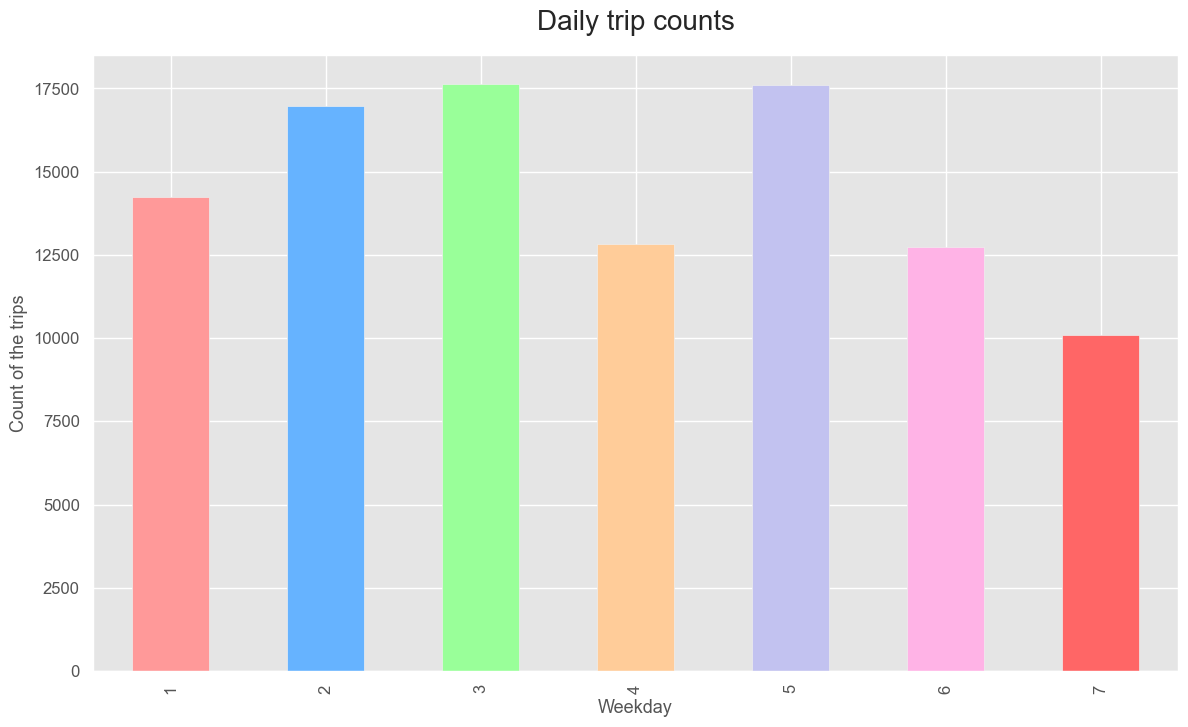

In [544]:
# Define a custom color palette
color_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#ffb366', '#b3b3ff', '#66ff66']

# Plotting the data
trips_per_weekday.plot(kind="bar", figsize=(14, 8), fontsize=12, color=color_palette)

# Adding titles and labels
plt.xlabel("Weekday", fontsize = 13)
plt.ylabel("Count of the trips", fontsize = 13)
plt.title("Daily trip counts", fontsize = 20, pad = 18)

# Show and save the plot into a file
figure = plt.gcf()

plt.show()

C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1709546059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)],
C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1709546059.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)],


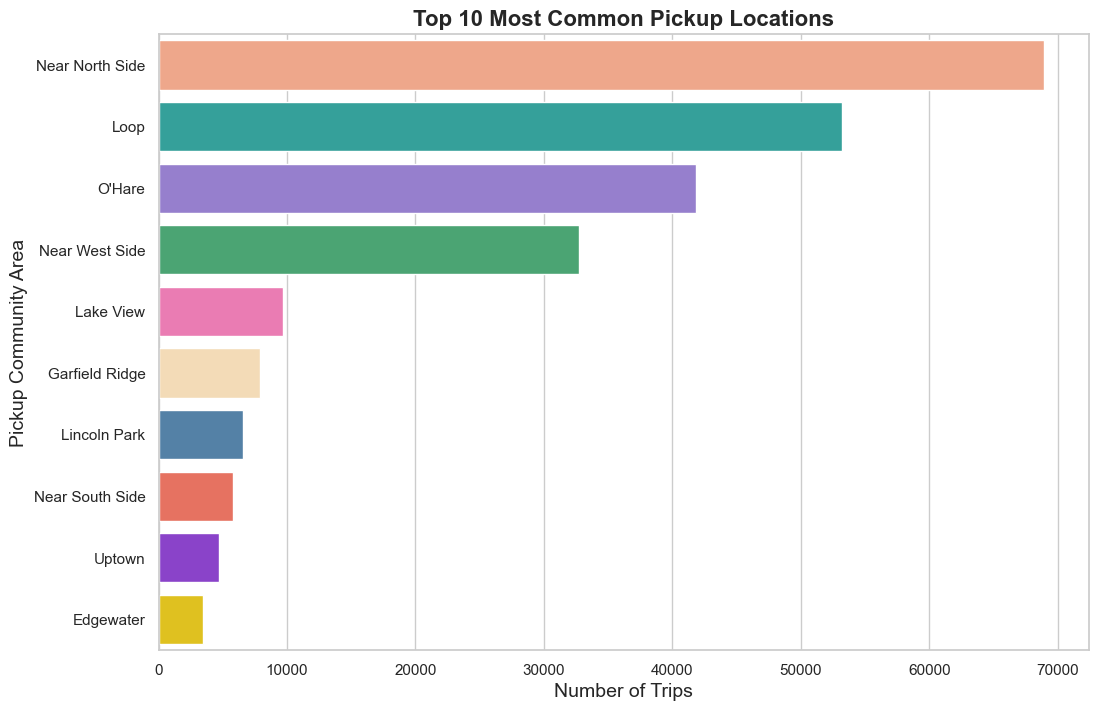

In [545]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Define a custom vibrant colormap with different colors
vibrant_cmap = LinearSegmentedColormap.from_list('vibrant', 
                                                 ['#ffa07a', '#20b2aa', '#9370db', 
                                                  '#3cb371', '#ff69b4', '#ffdead', 
                                                  '#4682b4', '#ff6347', '#8a2be2', 
                                                  '#ffd700'])
# Example: Most Common Pickup Locations
plt.figure(figsize=(12, 8))
top_10_pickup_areas = trips_full['pickup_community_area_name'].value_counts().nlargest(10).index

# Create the count plot with the vibrant color palette
sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)], 
              y='pickup_community_area_name', 
              order=top_10_pickup_areas, 
              palette=vibrant_cmap(np.linspace(0, 1, len(top_10_pickup_areas))))

# Add title and labels
plt.title('Top 10 Most Common Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Pickup Community Area', fontsize=14)

# Show the plot
plt.show()


C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1535743029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)],
C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1535743029.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)],


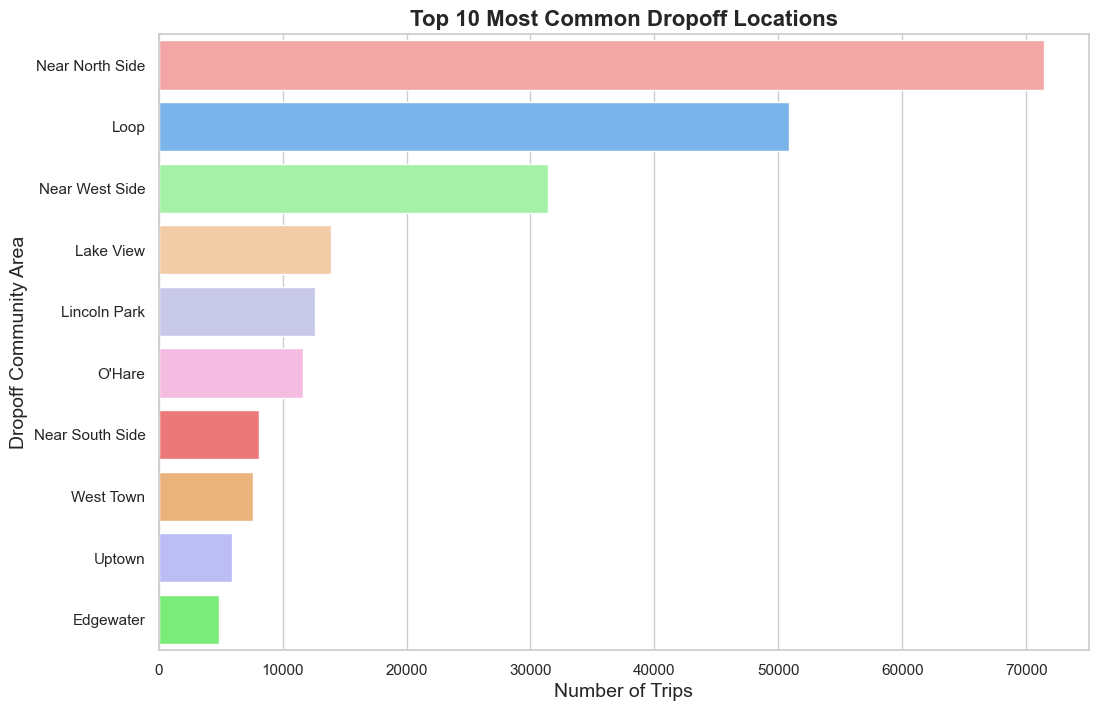

In [546]:
# Example: Most Common Dropoff Locations
plt.figure(figsize=(12, 8))

# Get the top 10 dropoff community areas
top_10_dropoff_areas = trips_full['dropoff_community_area_name'].value_counts().nlargest(10).index

# Define a vibrant color palette
vibrant_cmap = LinearSegmentedColormap.from_list('vibrant', ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#ffb366', '#b3b3ff', '#66ff66'])

# Create the count plot with the vibrant color palette
sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)], 
              y='dropoff_community_area_name', 
              order=top_10_dropoff_areas, 
              palette=vibrant_cmap(np.linspace(0, 1, 10)))

# Add title and labels
plt.title('Top 10 Most Common Dropoff Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Dropoff Community Area', fontsize=14)

# Show the plot
plt.show()



C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\2262163016.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekend_count = weekend_weekday_counts.get(1, 0)  # Default to 0 if key 1 is missing
C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\2262163016.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekday_count = weekend_weekday_counts.get(0, 0)  # Default to 0 if key 0 is missing


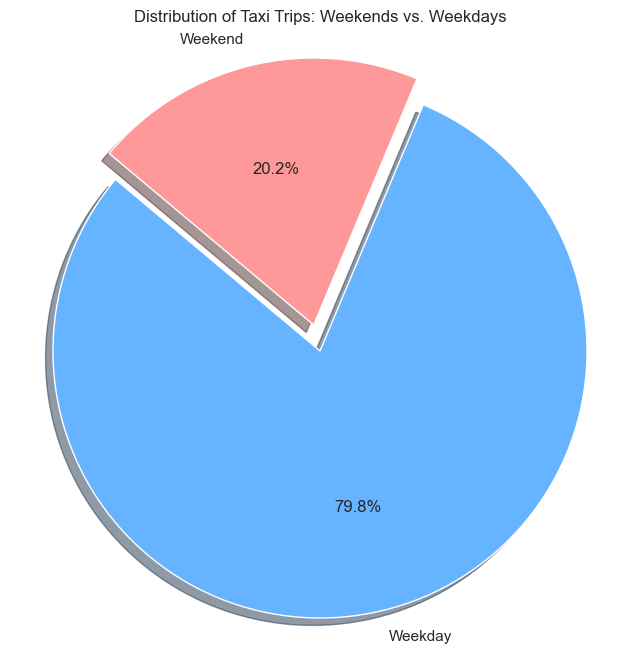

In [547]:
# Count the number of trips for weekends and weekdays
weekend_weekday_counts = trips_full['is_weekend'].value_counts()

# Ensure that both weekend and weekday values exist in the data
weekend_count = weekend_weekday_counts.get(1, 0)  # Default to 0 if key 1 is missing
weekday_count = weekend_weekday_counts.get(0, 0)  # Default to 0 if key 0 is missing

# Define labels and sizes for the pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_count, weekend_count]

# Define the explode values for the slices (optional)
explode_slices = (0.1, 0)  # Slightly "explode" the first slice (weekday)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode_slices, shadow=True, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Taxi Trips: Weekends vs. Weekdays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


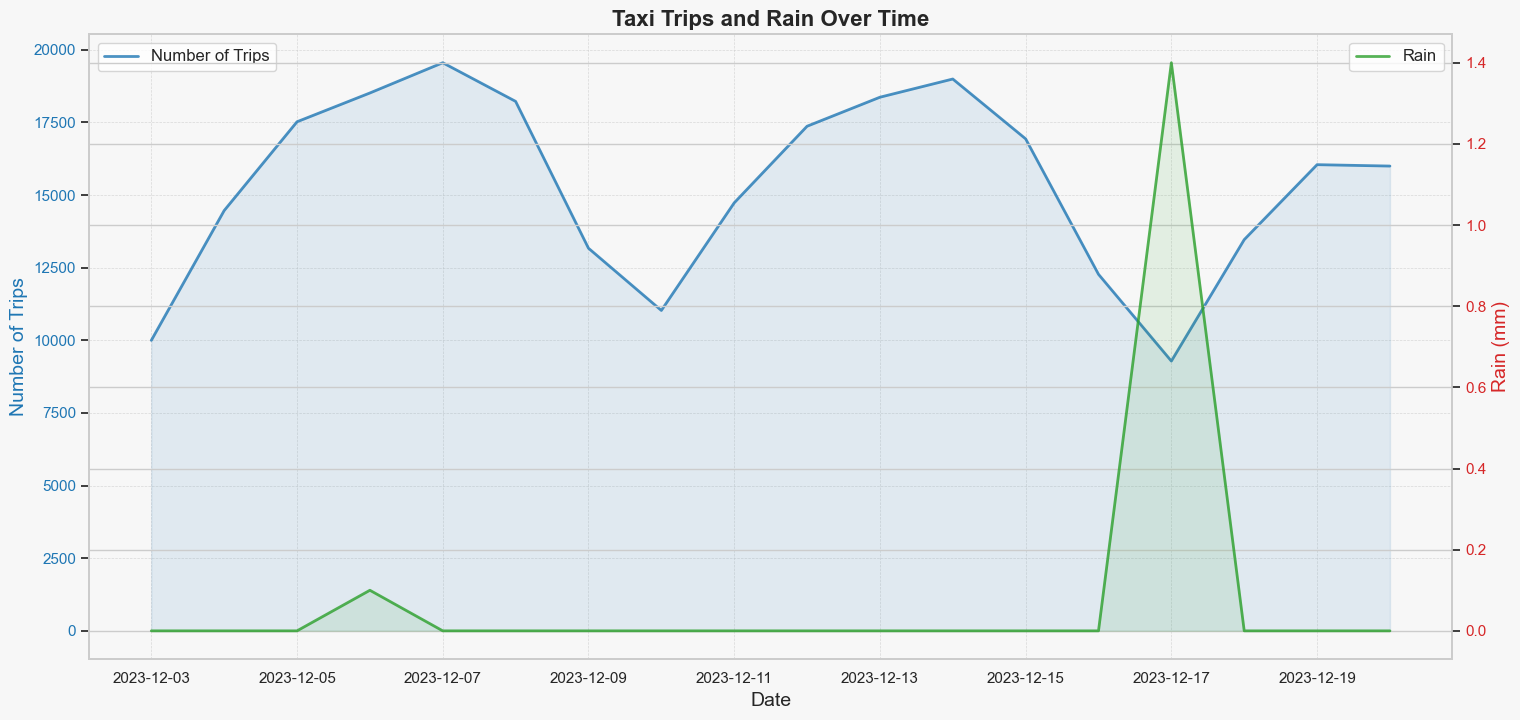

In [548]:
# Convert trip_start_timestamp to datetime if not already done
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])

# Aggregate the data to get the count of taxi trips per day
trips_per_day = trips_full.resample('D', on='trip_start_timestamp').size().reset_index(name='num_trips')

# Ensure the datetime column in weather data is in datetime format
weather['datetime'] = pd.to_datetime(weather['datetime'])

# Merge the aggregated data with the weather data to get rain 
rain_trips_data = pd.merge(trips_per_day, weather[['datetime', 'rain']], 
                           left_on='trip_start_timestamp', right_on='datetime', how='inner')

# Plot the rain and taxi trip counts
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plotting the number of trips with a gradient color line
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Number of Trips', color='tab:blue', fontsize=14)
ax1.plot(rain_trips_data['trip_start_timestamp'], rain_trips_data['num_trips'], 
         color='tab:blue', label='Number of Trips', linewidth=2, alpha=0.8)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.fill_between(rain_trips_data['trip_start_timestamp'], rain_trips_data['num_trips'], color='tab:blue', alpha=0.1)

# Create a second y-axis to plot the rain 
ax2 = ax1.twinx()
ax2.set_ylabel('Rain (mm)', color='tab:red', fontsize=14)
ax2.plot(rain_trips_data['trip_start_timestamp'], rain_trips_data['rain'], 
         color='tab:green', label='Rain', linewidth=2, alpha=0.8)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.fill_between(rain_trips_data['trip_start_timestamp'], rain_trips_data['rain'], color='tab:green', alpha=0.1)

# Customize the grid and background
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
fig.patch.set_facecolor('#f7f7f7')
ax1.set_facecolor('#f7f7f7')
ax2.set_facecolor('#3498db')

# Adding a legend
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Title and show the plot with enhanced font size
plt.title('Taxi Trips and Rain Over Time', fontsize=16, fontweight='bold')
fig.tight_layout(pad=3)
plt.show()


C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1385140518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
C:\Users\rotar\AppData\Local\Temp\ipykernel_20024\1385140518.py:7: UserWarning: 
The palette list has fewer values (4) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])


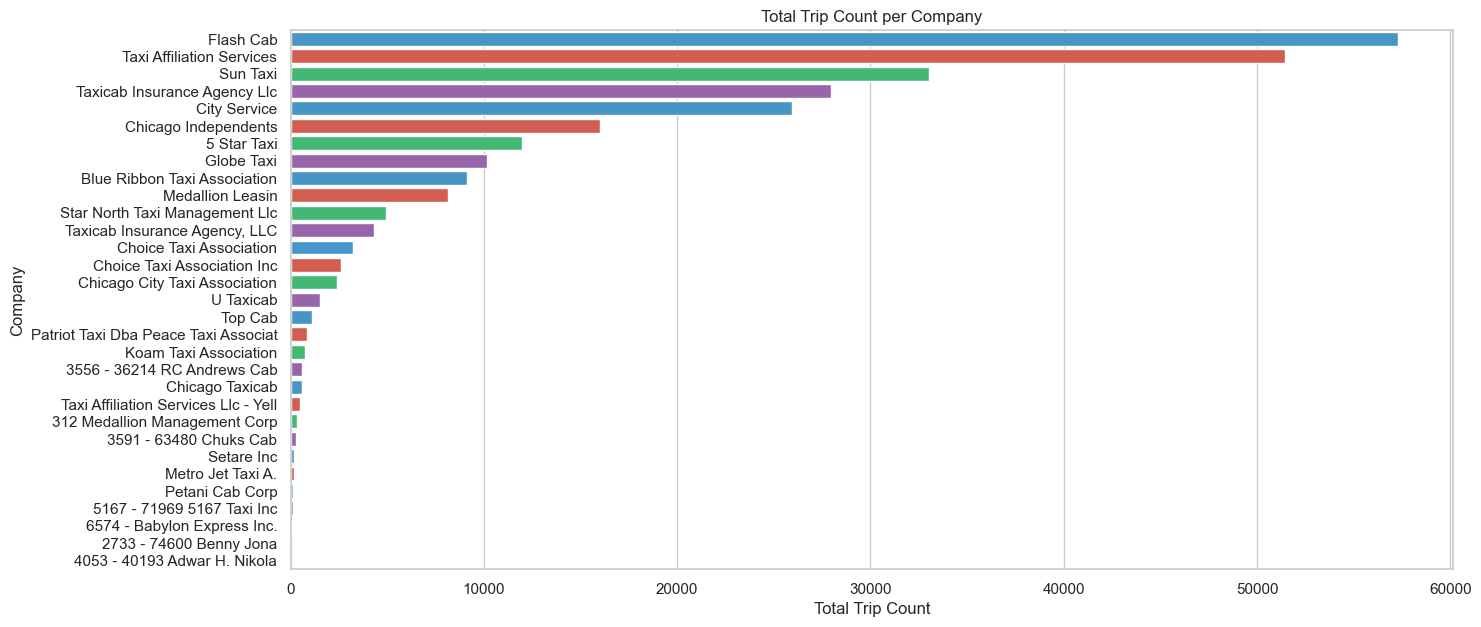

In [549]:
# Aggregate the data to get the total trip count per company
trip_total_per_company = trips_full['company'].value_counts().reset_index()
trip_total_per_company.columns = ['company', 'trip_total']

# Plot the total trip count per company
plt.figure(figsize=(15, 7))
sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
plt.title('Total Trip Count per Company')
plt.xlabel('Total Trip Count')
plt.ylabel('Company')
plt.show()

In [550]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,precipitation,rain,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date,year,month,day,day_of_week,is_weekend
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03 23:45:00,2023-12-03 23:45:00,360,0.50,5.00,0.00,0.0,4.5,9.50,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Near North Side,Loop,2023-12-03,2023,12,3,7,True
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03 23:45:00,2023-12-04 00:00:00,1312,17.61,43.25,9.75,0.0,5.0,58.50,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Near North Side,2023-12-04,2023,12,4,1,False
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03 23:45:00,2023-12-03 23:45:00,268,0.91,5.75,4.00,0.0,1.5,11.75,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Credit Card,Near North Side,Loop,2023-12-03,2023,12,3,7,True
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03 23:45:00,2023-12-04 00:00:00,1080,0.60,26.75,5.00,0.0,6.0,37.75,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Garfield Ridge,Near South Side,2023-12-04,2023,12,4,1,False
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03 23:45:00,2023-12-04 00:15:00,1692,10.07,29.00,0.00,0.0,0.0,29.00,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Prcard,Chatham,Armour Square,2023-12-04,2023,12,4,1,False


# Trip & Weather Count

Ez a kód négy hisztogramot hoz létre, amelyek a taxiutak és az időjárási adatok különböző aspektusait mutatják be. A diagramok a következő adatokat tartalmazzák:

1.Trip Seconds: Az utazás időtartama másodpercben (piros színnel).

2.Trip Miles: Az utazás hossza mérföldben (türkiz színnel).

3.Temperature: A hőmérséklet, két kategóriára bontva: hideg (kék) és meleg (sárga).

4.Rain: Az eső mennyisége (égkék színnel).

Text(0.5, 0.98, 'Trip & Weather Count')

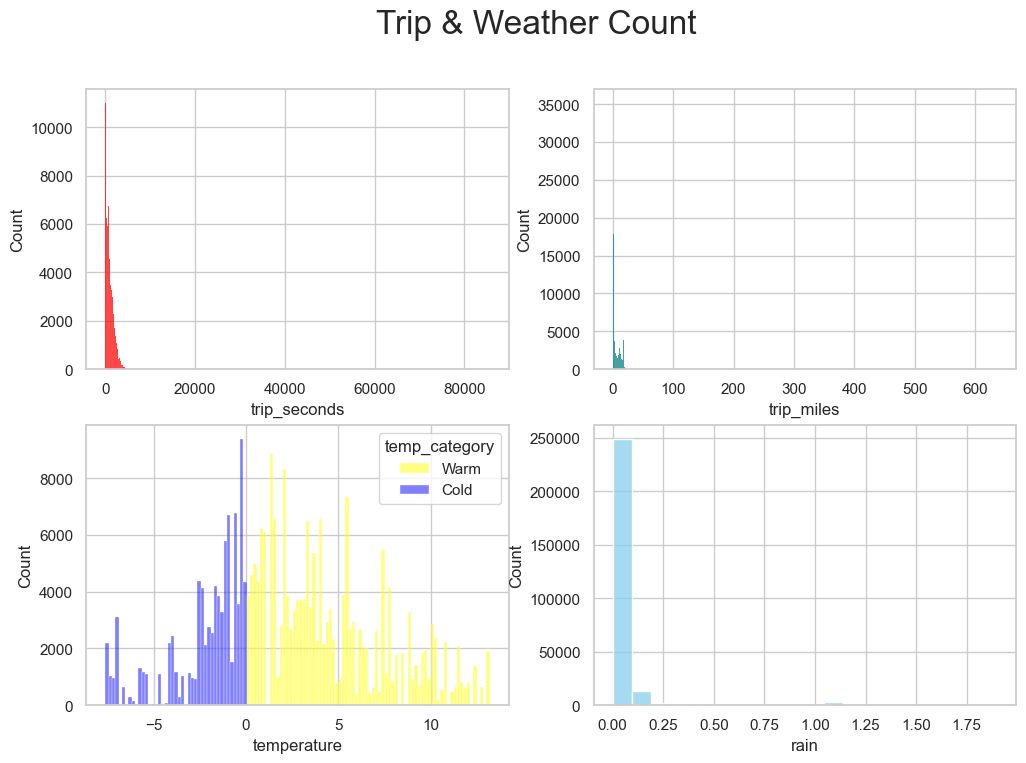

In [551]:
# Kategóriák létrehozása a hőmérséklet alapján
trips_full['temp_category'] = np.where(trips_full['temperature'] <= 0, 'Cold', 'Warm')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=trips_full, x="trip_seconds", ax=axes[0, 0],color='red')
sns.histplot(data=trips_full, x="trip_miles", ax=axes[0, 1], color="teal")
sns.histplot(data=trips_full, x="temperature", ax=axes[1, 0], hue='temp_category', palette={'Cold': 'blue', 'Warm': 'yellow'})
sns.histplot(data=trips_full, x="rain", ax=axes[1, 1], color="skyblue")

fig.suptitle("Trip & Weather Count", size=24)

# Wind Speed by Day of Week

Ez a KDE (Kernel Density Estimate) plot a szélsebesség eloszlását mutatja be a hét különböző napjain. A diagram a következőket tartalmazza:

-X tengely: Szélsebesség
-Y tengely: Sűrűség
-Színek: A hét napjai, egyéni színpalettával (coolwarm)

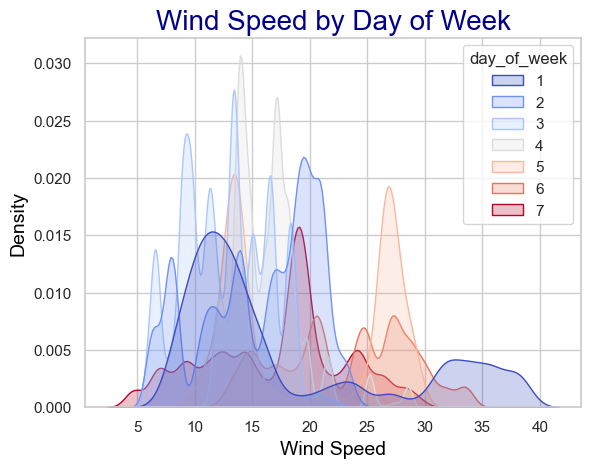

In [552]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

ax = sns.kdeplot(data=trips_full, x="wind_speed", hue="day_of_week", 
                 fill=True, palette=custom_palette)

ax.set_title("Wind Speed by Day of Week", size=20, color="darkblue")
ax.set_xlabel("Wind Speed", size=14, color="black")
ax.set_ylabel("Density", size=14, color="black")

plt.show()

#  Trip Distribution by Top 5 Pickup Community Areas


Ez a pie chart a leggyakoribb 5 közösségi területet mutatja be

In [553]:
counts = trips_full['pickup_community_area_name'].value_counts()
labels = counts.index

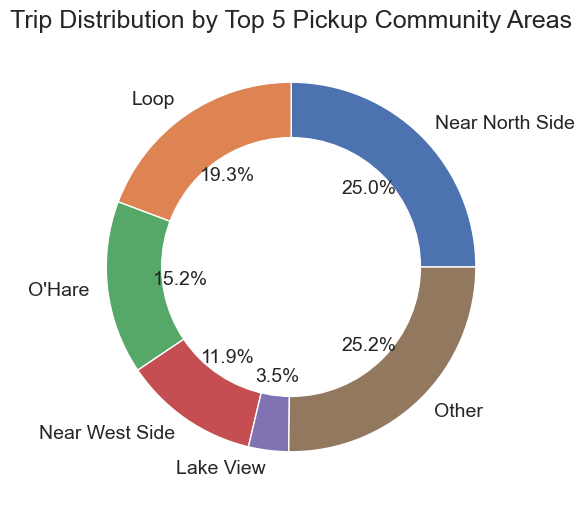

In [554]:
# Leggyakoribb 5 közösségi terület 
top_5 = counts.nlargest(5)
others = pd.Series([counts[5:].sum()], index=['Other'])

# Új kategóriák 
final_counts = pd.concat([top_5, others])
labels = final_counts.index

# Pie chart 
plt.figure(figsize=(6, 6))
plt.pie(final_counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14},
        wedgeprops={'edgecolor': '#ffffff'})

circle = plt.Circle(xy=(0, 0), radius=0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Trip Distribution by Top 5 Pickup Community Areas', size=18)
plt.show()


# Data Preparation - Creating the X and Y datasets

In [583]:
df2 = trips_full


In [584]:
df2.columns

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'datetime_for_weather', 'temperature', 'wind_speed', 'precipitation',
       'rain', 'company', 'payment_type', 'pickup_community_area_name',
       'dropoff_community_area_name', 'trip_start_date', 'year', 'month',
       'day', 'day_of_week', 'is_weekend', 'temp_category'],
      dtype='object')

In [585]:
df_x = df2[['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'temperature', 'wind_speed', 'precipitation',
       'rain','year', 'month',
       'day', 'day_of_week',]]
df_y = df2['temperature']
df_z = df2['day_of_week']

x = np.array(df_x)
y = np.array(df_y)


In [586]:
x

array([[3.600e+02, 5.000e-01, 5.000e+00, ..., 1.200e+01, 3.000e+00,
        7.000e+00],
       [1.312e+03, 1.761e+01, 4.325e+01, ..., 1.200e+01, 4.000e+00,
        1.000e+00],
       [2.680e+02, 9.100e-01, 5.750e+00, ..., 1.200e+01, 3.000e+00,
        7.000e+00],
       ...,
       [1.491e+03, 1.778e+01, 4.375e+01, ..., 1.200e+01, 2.000e+01,
        3.000e+00],
       [1.560e+03, 4.000e-01, 2.325e+01, ..., 1.200e+01, 2.000e+01,
        3.000e+00],
       [4.200e+02, 1.200e+00, 6.750e+00, ..., 1.200e+01, 2.000e+01,
        3.000e+00]])

In [587]:
y

array([ 3.6,  3.6,  3.6, ..., -1. , -1. , -1. ])

In [588]:
# average_income_of_riders - on Axis X
axis_x = x[: 5]
axis_x

array([[ 3.60000000e+02,  5.00000000e-01,  5.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.50000000e+00,
         9.50000000e+00,  4.18925078e+01, -8.76262149e+01,
         4.18849872e+01, -8.76209929e+01,  3.60000000e+00,
         1.91000000e+01,  0.00000000e+00,  0.00000000e+00,
         2.02300000e+03,  1.20000000e+01,  3.00000000e+00,
         7.00000000e+00],
       [ 1.31200000e+03,  1.76100000e+01,  4.32500000e+01,
         9.75000000e+00,  0.00000000e+00,  5.00000000e+00,
         5.85000000e+01,  4.19802643e+01, -8.79136246e+01,
         4.18996021e+01, -8.76333080e+01,  3.60000000e+00,
         1.91000000e+01,  0.00000000e+00,  0.00000000e+00,
         2.02300000e+03,  1.20000000e+01,  4.00000000e+00,
         1.00000000e+00],
       [ 2.68000000e+02,  9.10000000e-01,  5.75000000e+00,
         4.00000000e+00,  0.00000000e+00,  1.50000000e+00,
         1.17500000e+01,  4.18925078e+01, -8.76262149e+01,
         4.18809945e+01, -8.76327465e+01,  3.60000000e+00,
    

In [589]:
axis_y = y[: 16]
axis_y

array([3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6,
       3.6, 3.6, 3.6])

In [590]:
axis_z = y
axis_z

array([ 3.6,  3.6,  3.6, ..., -1. , -1. , -1. ])

In [591]:
# range of average_income_of_riders values for coordinates
x1_pred = np.linspace(-100, 1250, 30)
# # range of average_parking_rates values for coordinates
x2_pred = np.linspace(0, 10, 30)


print(x1_pred)
print(x2_pred)

[-100.          -53.44827586   -6.89655172   39.65517241   86.20689655
  132.75862069  179.31034483  225.86206897  272.4137931   318.96551724
  365.51724138  412.06896552  458.62068966  505.17241379  551.72413793
  598.27586207  644.82758621  691.37931034  737.93103448  784.48275862
  831.03448276  877.5862069   924.13793103  970.68965517 1017.24137931
 1063.79310345 1110.34482759 1156.89655172 1203.44827586 1250.        ]
[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [592]:
# create the coordinate matrices/arrays from the coordinate vectors
x1_pred, x2_pred = np.meshgrid(x1_pred, x2_pred)


In [593]:
print(x1_pred.flatten().shape)
print(x2_pred.flatten().shape)


(900,)
(900,)


In [594]:
# collapse coordinate matrices to 1D, create an array
x_test = np.array([x1_pred.flatten(), x2_pred.flatten()])
print(x_test)
print(x_test.shape)


[[-100.          -53.44827586   -6.89655172 ... 1156.89655172
  1203.44827586 1250.        ]
 [   0.            0.            0.         ...   10.
    10.           10.        ]]
(2, 900)


In [595]:
# transpose array (rows and columns switched)
x_test = x_test.transpose()
print(x_test)
print(x_test.shape)


[[-100.            0.        ]
 [ -53.44827586    0.        ]
 [  -6.89655172    0.        ]
 ...
 [1156.89655172   10.        ]
 [1203.44827586   10.        ]
 [1250.           10.        ]]
(900, 2)


In [596]:
# allocate n % of data randomly for training, and the remaining for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [569]:
# Modell létrehozása
model = LinearRegression()

In [597]:
# train the model
model.fit(x_train, y_train)

LinearRegression()

In [598]:
# train the model
model.fit(x, y)


LinearRegression()

In [599]:
# the model's accuracy score: R squared -> (Determinacios együthato) (coefficient of determination)
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 100.00%


In [600]:
# the constant in the regression equation (the intercept = metszes pont az y tengelyen) on the y axis)
b0 = model.intercept_
b0

np.float64(-3.4505731605349865e-13)

In [601]:
#coefficients (multipliers) in the regression equation

bn_xn = model.coef_
bn_xn

array([ 4.90969136e-18,  1.78676518e-16,  5.90425412e-16,  1.56352370e-15,
        1.20261891e-15,  1.85651294e-15, -1.53956049e-15, -5.11787867e-15,
       -2.44591189e-15, -4.22349755e-16, -4.18256617e-15,  1.00000000e+00,
        1.24016653e-16,  2.20174924e-15, -1.71348419e-15, -2.71050543e-20,
        0.00000000e+00, -3.84891771e-18,  6.18029120e-17])

In [602]:
# the predictions with the model
y_pred = model.predict(x_test)
y_pred.round(2)

array([ 1.8,  7.8,  8.9, ..., -2. , -2.2,  7.2])

In [576]:
#df2

In [577]:
# index = df_x.columns.get_loc('day')
# print(index)

In [581]:
# print(f"axis_x shape: {axis_x.shape}")
# print(f"axis_y shape: {axis_y.shape}")
# print(f"axis_z shape: {axis_z.shape}")

axis_x shape: (5, 19)
axis_y shape: (16,)
axis_z shape: (275980,)


# Chicago Trips 3D Szórásdiagram Vizualizáció

Ez a 3D diagram a Chicago-i taxiutak adatait mutatja be. A diagram három tengelyen ábrázolja az adatokat:

X tengely: Az utazás hossza mérföldben (Trip Miles)
Y tengely: A hőmérséklet Celsius fokban (Temperature °C)
Z tengely: A szélsebesség kilométer per órában (Wind Speed km/h)
A pontok színe a hőmérséklet értékétől függ, amelyet a színes skála (viridis) mutat. A diagram 1000 véletlenszerűen kiválasztott adatpontot tartalmaz, hogy az adatok jobban áttekinthetők legyenek.

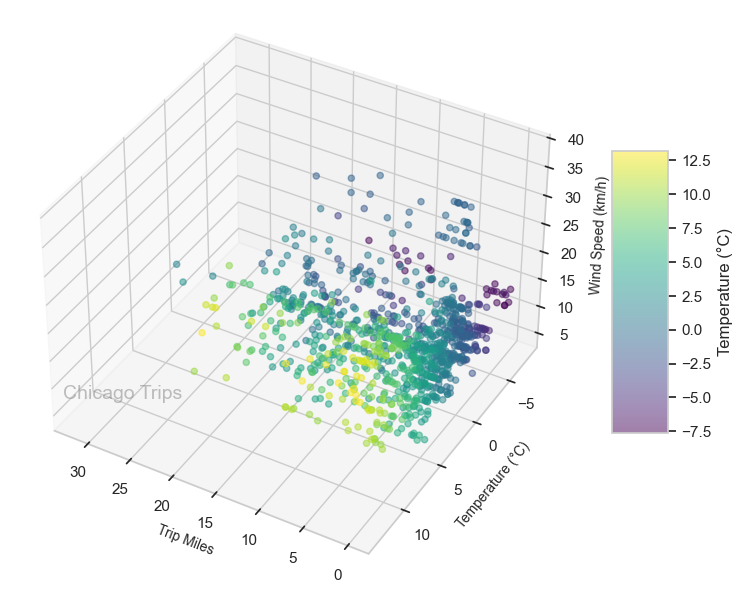

In [604]:
# Adatok
axis_x = trips_full['trip_miles']
axis_y = trips_full['temperature']
axis_z = trips_full['wind_speed']

# Véletlenszerű mintavételezés
sample_size = 1000  # A mintavételezett pontok száma
sample_indices = np.random.choice(len(axis_x), sample_size, replace=False)

sample_x = axis_x.iloc[sample_indices]
sample_y = axis_y.iloc[sample_indices]
sample_z = axis_z.iloc[sample_indices]

# Ábra és alábra létrehozása
fig, ax = plt.subplots(figsize=(8, 6), layout='tight', subplot_kw={'projection': '3d'})

# Scatter plot színezéssel és méretváltoztatással
scatter = ax.scatter(sample_x, sample_y, sample_z, c=sample_y, cmap='viridis', s=20, alpha=0.5)

# Színes skála hozzáadása
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Temperature (°C)')

# Tengelyek címkézése
ax.set_xlabel('Trip Miles', fontsize=10)
ax.set_ylabel('Temperature (°C)', fontsize=10)
ax.set_zlabel('Wind Speed (km/h)', fontsize=10)

# 2D szöveg hozzáadása
ax.text2D(0.2, 0.32, 'Chicago Trips', fontsize=14, ha='center', va='center',
          transform=ax.transAxes, color='grey', alpha=0.5)

# Kezdeti nézet beállítása
ax.view_init(elev=38, azim=120)

# Paddings beállítása
plt.subplots_adjust(left=0, top=1, right=1, bottom=0, wspace=0, hspace=0)
plt.show()
